In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.shape

(200, 6)

In [ ]:
df.isnull().any()


Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

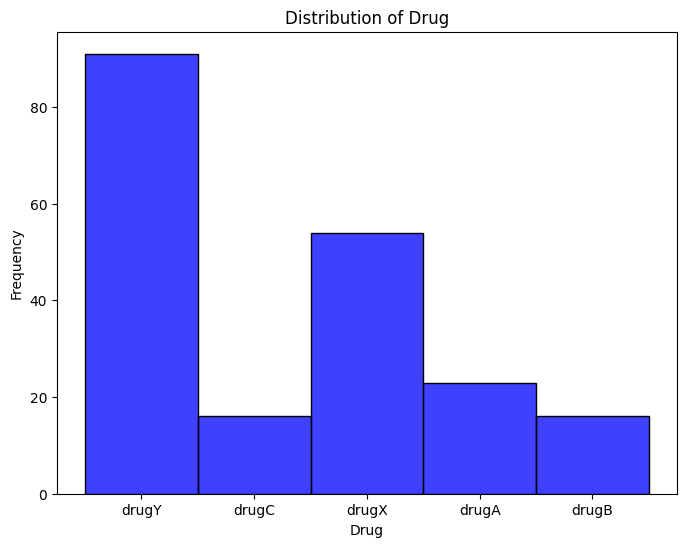

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Drug'], bins=20, color='blue')
plt.xlabel('Drug')
plt.ylabel('Frequency')
plt.title('Distribution of Drug')
plt.show()

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
x= df.drop(columns='Drug', axis=1)


In [ ]:
y=df.Drug
y.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.3 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['Sex', 'BP', 'Cholesterol'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [ ]:
x_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
59,34,1,1,1,18.703
120,28,1,2,1,27.064
146,37,2,3,2,12.006
129,32,2,2,1,7.477
18,23,1,3,1,7.298


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = clf.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score

train_score = accuracy_score(y_train, y_pred)

print(f'Validation Accuracy: {train_score * 100:.2f}%')

Validation Accuracy: 100.00%


[Text(0.5555555555555556, 0.9, 'Na_to_K <= 14.839\nentropy = 1.929\nsamples = 160\nvalue = [17, 11, 12, 48, 72]\nclass = drugA'),
 Text(0.4444444444444444, 0.7, 'BP <= 1.5\nentropy = 1.702\nsamples = 88\nvalue = [17, 11, 12, 48, 0]\nclass = drugB'),
 Text(0.2222222222222222, 0.5, 'Age <= 51.5\nentropy = 0.967\nsamples = 28\nvalue = [17, 11, 0, 0, 0]\nclass = drugY'),
 Text(0.1111111111111111, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]\nclass = drugY'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 11\nvalue = [0, 11, 0, 0, 0]\nclass = drugX'),
 Text(0.6666666666666666, 0.5, 'BP <= 2.5\nentropy = 0.722\nsamples = 60\nvalue = [0, 0, 12, 48, 0]\nclass = drugB'),
 Text(0.5555555555555556, 0.3, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]\nclass = drugB'),
 Text(0.7777777777777778, 0.3, 'Cholesterol <= 1.5\nentropy = 0.978\nsamples = 29\nvalue = [0, 0, 12, 17, 0]\nclass = drugB'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 

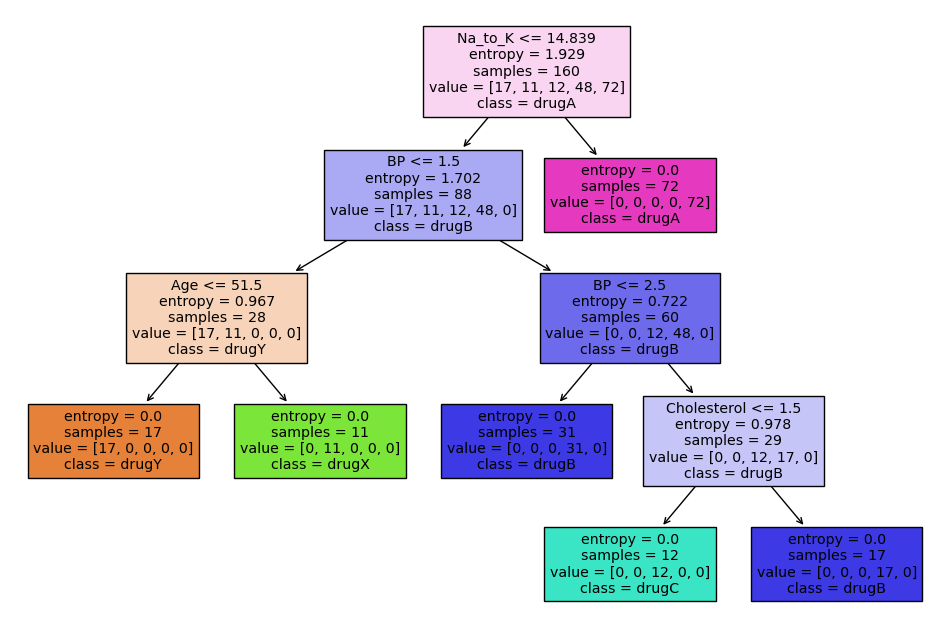

In [ ]:
from sklearn import tree

features = list(x_train.columns)
target = list(y_train.unique())

plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=features, class_names=target)